# Cosine Similarity in NLP: Understanding Text Similarity Through Vector Representations

## Introduction

Welcome to our exploration of cosine similarity! In this notebook, we'll dive deep into one of the most fundamental and useful similarity measures in Natural Language Processing. Building on what we've learned about vector semantics and TF-IDF, we'll see how cosine similarity helps us quantify the similarity between texts in a way that's both intuitive and mathematically sound.

### Learning Objectives

By the end of this notebook, you'll be able to:
- Understand what cosine similarity measures and why it's particularly useful for text data
- Calculate cosine similarity manually and using libraries
- Apply cosine similarity to real-world NLP tasks
- Visualize similarity relationships in vector spaces
- Build simple applications using cosine similarity

### Why Should You Care?

Cosine similarity is the backbone of many NLP applications you use daily:
- Search engines use it to find relevant documents
- Recommendation systems use it to suggest similar products or content
- Plagiarism detection systems use it to find similar texts
- Question-answering systems use it to find answers similar to questions

Let's get started on our learning journey!

## 1. The Intuition Behind Cosine Similarity

### What Is Similarity, Really?

Before diving into cosine similarity, let's think about what "similarity" means. When are two texts similar?

- Same topic? (e.g., both about sports)
- Same sentiment? (e.g., both positive reviews)
- Same writing style? (e.g., both formal academic texts)
- Same author? (e.g., both written by Hemingway)

In NLP, we often represent text as vectors in a high-dimensional space, where each dimension represents some feature of the text (like the frequency of a specific word). 

**Similarity then becomes a question of how "close" these vectors are to each other in this space.**

### The Problem with Euclidean Distance

You might initially think of measuring the straight-line (Euclidean) distance between vectors. However, this approach has a critical issue for text data: **document length**.

Consider two documents with identical content, but one is twice as long (repeating the same terms). Their vectors would point in the same direction but have different magnitudes, making them seem dissimilar by Euclidean standards.

### Enter Cosine Similarity: Measuring Direction, Not Magnitude

Cosine similarity solves this problem by measuring the **angle** between vectors, not their magnitude or distance:

- If vectors point in the same direction (angle = 0°), cosine similarity = 1 (maximum similarity)
- If vectors are perpendicular (angle = 90°), cosine similarity = 0 (no similarity)
- If vectors point in opposite directions (angle = 180°), cosine similarity = -1 (maximum dissimilarity, though this is rare in text data as features are typically non-negative)

Let's visualize this concept:

```
      ^
      |
      |  Document 1 (short)
      |  /
      | /
      |/      
------+------>
       \
        \
         \
          Document 2 (long, but similar content)
```

Even though Document 2 is longer (its vector extends further from the origin), the angle between the document vectors is small, indicating high similarity.

### The Mathematical Formula

The cosine similarity between two vectors A and B is:

$$\text{cosine similarity} = \frac{A \cdot B}{||A|| \times ||B||} = \frac{\sum_{i=1}^{n} A_i B_i}{\sqrt{\sum_{i=1}^{n} A_i^2} \times \sqrt{\sum_{i=1}^{n} B_i^2}}$$

Where:
- $A \cdot B$ is the dot product of vectors A and B
- $||A||$ and $||B||$ are the magnitudes (Euclidean norms) of vectors A and B

In simpler terms:
- Compute the dot product of the vectors (multiply corresponding elements and sum)
- Divide by the product of the vector magnitudes (normalization)

## 2. Let's Calculate Cosine Similarity By Hand

To ensure we truly understand the concept, let's calculate cosine similarity manually with a simple example.

Imagine we have two very short documents:
- Document 1: "I love dogs and cats"
- Document 2: "I love dogs"

Let's create simple word count vectors for these documents:

```
Vocabulary = ["I", "love", "dogs", "and", "cats"]

Document 1 vector = [1, 1, 1, 1, 1]  # Each word appears once
Document 2 vector = [1, 1, 1, 0, 0]  # "and" and "cats" don't appear
```

Now, let's apply the cosine similarity formula:

$$\text{cosine similarity} = \frac{1 \times 1 + 1 \times 1 + 1 \times 1 + 1 \times 0 + 1 \times 0}{\sqrt{1^2 + 1^2 + 1^2 + 1^2 + 1^2} \times \sqrt{1^2 + 1^2 + 1^2 + 0^2 + 0^2}}$$

$$= \frac{3}{\sqrt{5} \times \sqrt{3}} = \frac{3}{\sqrt{15}} \approx 0.775$$

This result tells us the documents are fairly similar (0.775 on a scale from 0 to 1), which makes intuitive sense - Document 2 contains most of the words from Document 1.

Let's implement this calculation in Python:

In [ ]:
import numpy as np

# Our document vectors
doc1 = np.array([1, 1, 1, 1, 1])
doc2 = np.array([1, 1, 1, 0, 0])

# Calculate cosine similarity
dot_product = np.dot(doc1, doc2)
norm_doc1 = np.linalg.norm(doc1)
norm_doc2 = np.linalg.norm(doc2)
cosine_similarity = dot_product / (norm_doc1 * norm_doc2)

print(f"Cosine Similarity: {cosine_similarity:.3f}")

Cosine Similarity: 0.775




## 3. Cosine Similarity in Practice with Real Text Data

Now, let's apply cosine similarity to more realistic text data using the techniques we learned in previous notebooks.

First, we'll need to:
1. Preprocess our texts
2. Convert them to vector representations (we'll use TF-IDF that we learned previously)
3. Calculate cosine similarity between the vectors

Vocabulary (features): ['algorithms' 'are' 'artificial' 'brains' 'by' 'can' 'computers' 'data'
 'deep' 'field' 'focused' 'how' 'human' 'inspired' 'intelligence'
 'interact' 'is' 'language' 'learning' 'machine' 'natural' 'networks'
 'neural' 'of' 'on' 'process' 'processing' 'structure' 'subset' 'the'
 'transforming' 'we' 'with']

TF-IDF Matrix shape: (5, 33)

TF-IDF Matrix:
   algorithms       are  artificial    brains        by       can  computers  \
0    0.000000  0.000000    0.337837  0.000000  0.000000  0.000000   0.000000   
1    0.389141  0.000000    0.000000  0.000000  0.000000  0.389141   0.000000   
2    0.000000  0.000000    0.289802  0.000000  0.000000  0.000000   0.359203   
3    0.000000  0.000000    0.000000  0.000000  0.000000  0.000000   0.000000   
4    0.000000  0.347067    0.000000  0.347067  0.347067  0.000000   0.000000   

       data      deep    field  ...        of        on   process  processing  \
0  0.000000  0.000000  0.41874  ...  0.337837  0.000000  0.000

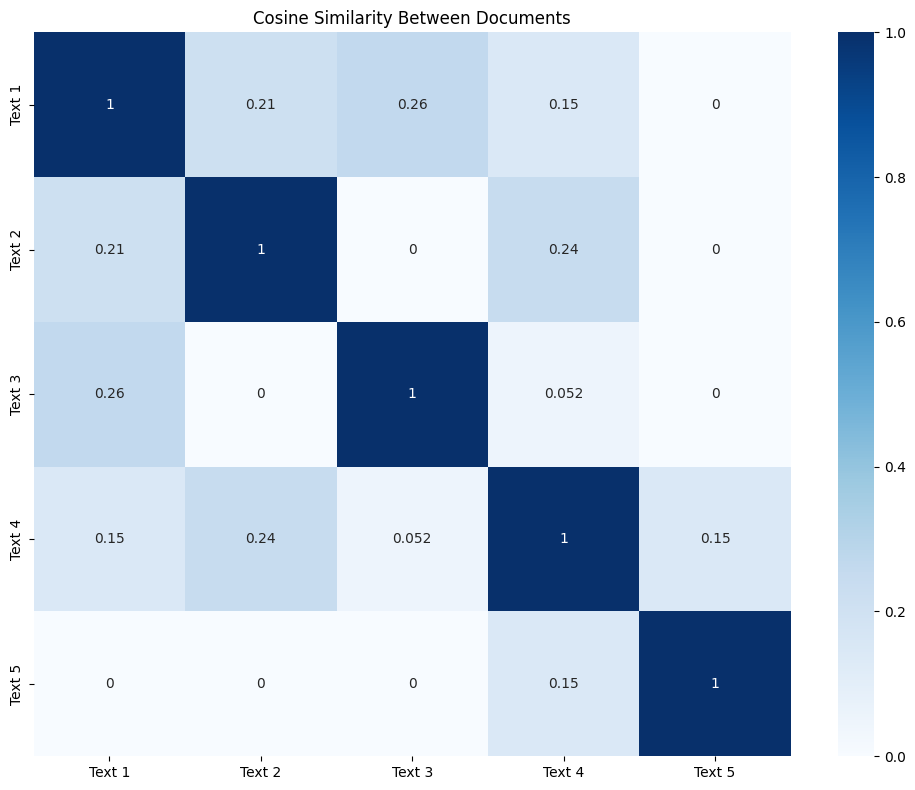

In [ ]:
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Sample texts
texts = [
    "Natural language processing is a field of artificial intelligence.",
    "Machine learning algorithms can process natural language data.",
    "Artificial intelligence is transforming how we interact with computers.",
    "Deep learning is a subset of machine learning focused on neural networks.",
    "Neural networks are inspired by the human brain's structure."
]

# Step 1: Preprocess texts (simple preprocessing for now)
def preprocess(text):
    # Convert to lowercase and remove special characters
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

processed_texts = [preprocess(text) for text in texts]

# Step 2: Convert to TF-IDF vectors
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_texts)

# Let's see the vocabulary and the matrix
feature_names = vectorizer.get_feature_names_out()
print("Vocabulary (features):", feature_names)
print("\nTF-IDF Matrix shape:", tfidf_matrix.shape)
print("\nTF-IDF Matrix:")
print(pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names))

# Step 3: Calculate cosine similarity between all pairs of documents
cosine_sim_matrix = cosine_similarity(tfidf_matrix)
print("\nCosine Similarity Matrix:")
print(pd.DataFrame(cosine_sim_matrix, 
                  index=[f"Text {i+1}" for i in range(len(texts))],
                  columns=[f"Text {i+1}" for i in range(len(texts))]))

# Visualize the similarity matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cosine_sim_matrix, annot=True, cmap='Blues', 
            xticklabels=[f"Text {i+1}" for i in range(len(texts))],
            yticklabels=[f"Text {i+1}" for i in range(len(texts))])
plt.title('Cosine Similarity Between Documents')
plt.tight_layout()
plt.show()

### Understanding the Results

Let's analyze the similarity matrix:

- The diagonal (similarity of each document with itself) is always 1.0, as expected.
- Texts about related concepts have higher similarity scores.
- Texts with little vocabulary overlap have lower similarity scores.

Notice how the similarity between Text 1 and Text 2 is relatively high because both mention "natural language," while the similarity between Text 1 and Text 5 is lower because they focus on different aspects of AI.

## 4. Why Cosine Similarity Works Well for Text Data

Cosine similarity is particularly well-suited for text analysis for several important reasons:

### 1. Handling High-Dimensional, Sparse Vectors

Text data, when converted to vectors (especially with bag-of-words or TF-IDF), creates:
- **High-dimensional vectors**: A corpus might have thousands of unique words
- **Sparse vectors**: Most documents use only a small subset of all possible words

Cosine similarity works efficiently with such vectors because it only considers dimensions where at least one vector has non-zero values.

### 2. Focus on Shared Terms

Cosine similarity emphasizes the terms that documents have in common, rather than terms that are absent from both documents. This makes intuitive sense for text similarity.

### 3. Length Normalization

As we discussed earlier, cosine similarity normalizes for document length, so a short paragraph about AI can be highly similar to a long research paper about AI if they use proportionally similar vocabulary.

### 4. Bounded Range

Cosine similarity provides values in the range [-1, 1] for any vectors, or [0, 1] for text data with non-negative features (like word counts or TF-IDF), making results easy to interpret.

## 5. Practical Applications of Cosine Similarity in NLP

Let's explore some real-world applications by implementing simple examples:

### 5.1 Document Search Engine

In [9]:
# A simple document search engine using cosine similarity
documents = [
    "Python is a high-level programming language with simple syntax.",
    "Natural language processing helps computers understand human language.",
    "Machine learning algorithms learn patterns from data.",
    "Deep learning is revolutionizing artificial intelligence applications.",
    "Python is commonly used for data science and machine learning projects."
]

# Process and vectorize the documents
vectorizer = TfidfVectorizer()
document_vectors = vectorizer.fit_transform(documents)

def search(query, top_n=2):
    """Search for documents similar to the query."""
    # Vectorize the query using the same vectorizer
    query_vector = vectorizer.transform([query])
    
    # Calculate similarity between query and all documents
    similarities = cosine_similarity(query_vector, document_vectors)[0]
    
    # Get indices of top N similar documents
    top_indices = similarities.argsort()[-top_n:][::-1]
    
    # Return results
    results = []
    for idx in top_indices:
        results.append({
            'document': documents[idx],
            'similarity': similarities[idx]
        })
    
    return results

# Let's try a few searches
search_queries = [
    "Python programming",
    "NLP and human language",
    "AI and deep learning"
]

for query in search_queries:
    results = search(query)
    print(f"\nSearch query: '{query}'")
    for i, result in enumerate(results, 1):
        print(f"{i}. {result['document']} (Similarity: {result['similarity']:.3f})")


Search query: 'Python programming'
1. Python is a high-level programming language with simple syntax. (Similarity: 0.462)
2. Python is commonly used for data science and machine learning projects. (Similarity: 0.170)

Search query: 'NLP and human language'
1. Natural language processing helps computers understand human language. (Similarity: 0.482)
2. Python is commonly used for data science and machine learning projects. (Similarity: 0.206)

Search query: 'AI and deep learning'
1. Deep learning is revolutionizing artificial intelligence applications. (Similarity: 0.381)
2. Python is commonly used for data science and machine learning projects. (Similarity: 0.311)


### 5.2 Document Clustering

In [5]:
from sklearn.cluster import KMeans

# Let's cluster our documents based on similarity
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(document_vectors)

# Get cluster assignments
clusters = kmeans.labels_

# Print clusters
for i in range(num_clusters):
    print(f"\nCluster {i+1}:")
    for j, doc in enumerate(documents):
        if clusters[j] == i:
            print(f"- {doc}")


Cluster 1:
- Python is a high-level programming language with simple syntax.
- Natural language processing helps computers understand human language.

Cluster 2:
- Machine learning algorithms learn patterns from data.
- Deep learning is revolutionizing artificial intelligence applications.
- Python is commonly used for data science and machine learning projects.


### 5.3 Recommendation System

In [6]:
# A simple recommendation system based on content similarity
articles = [
    "The Benefits of Regular Exercise for Mental Health",
    "Machine Learning Applications in Healthcare",
    "Beginner's Guide to Python Programming",
    "How to Stay Motivated While Working from Home",
    "Deep Learning Frameworks Comparison: TensorFlow vs PyTorch",
    "Healthy Eating Habits for Improved Productivity"
]

# Process and vectorize the articles
vectorizer = TfidfVectorizer()
article_vectors = vectorizer.fit_transform(articles)

# Calculate similarity matrix
article_similarities = cosine_similarity(article_vectors)

def recommend_articles(article_idx, num_recommendations=2):
    """Recommend similar articles based on a given article."""
    # Get similarity scores for the article
    similarities = article_similarities[article_idx]
    
    # Get indices of most similar articles (excluding itself)
    similar_indices = similarities.argsort()[:-num_recommendations-2:-1]
    similar_indices = [idx for idx in similar_indices if idx != article_idx][:num_recommendations]
    
    # Return recommendations
    recommendations = []
    for idx in similar_indices:
        recommendations.append({
            'article': articles[idx],
            'similarity': similarities[idx]
        })
    
    return recommendations

# Let's get recommendations for each article
for i, article in enumerate(articles):
    print(f"\nIf you like: '{article}'")
    recommendations = recommend_articles(i)
    for j, rec in enumerate(recommendations, 1):
        print(f"{j}. {rec['article']} (Similarity: {rec['similarity']:.3f})")


If you like: 'The Benefits of Regular Exercise for Mental Health'
1. Healthy Eating Habits for Improved Productivity (Similarity: 0.102)
2. Deep Learning Frameworks Comparison: TensorFlow vs PyTorch (Similarity: 0.000)

If you like: 'Machine Learning Applications in Healthcare'
1. Deep Learning Frameworks Comparison: TensorFlow vs PyTorch (Similarity: 0.120)
2. Healthy Eating Habits for Improved Productivity (Similarity: 0.000)

If you like: 'Beginner's Guide to Python Programming'
1. How to Stay Motivated While Working from Home (Similarity: 0.112)
2. Healthy Eating Habits for Improved Productivity (Similarity: 0.000)

If you like: 'How to Stay Motivated While Working from Home'
1. Beginner's Guide to Python Programming (Similarity: 0.112)
2. Healthy Eating Habits for Improved Productivity (Similarity: 0.000)

If you like: 'Deep Learning Frameworks Comparison: TensorFlow vs PyTorch'
1. Machine Learning Applications in Healthcare (Similarity: 0.120)
2. Healthy Eating Habits for Improv

## 6. Visualizing Vector Similarity in 2D

To better understand vector relationships, let's visualize our documents in a 2D space:

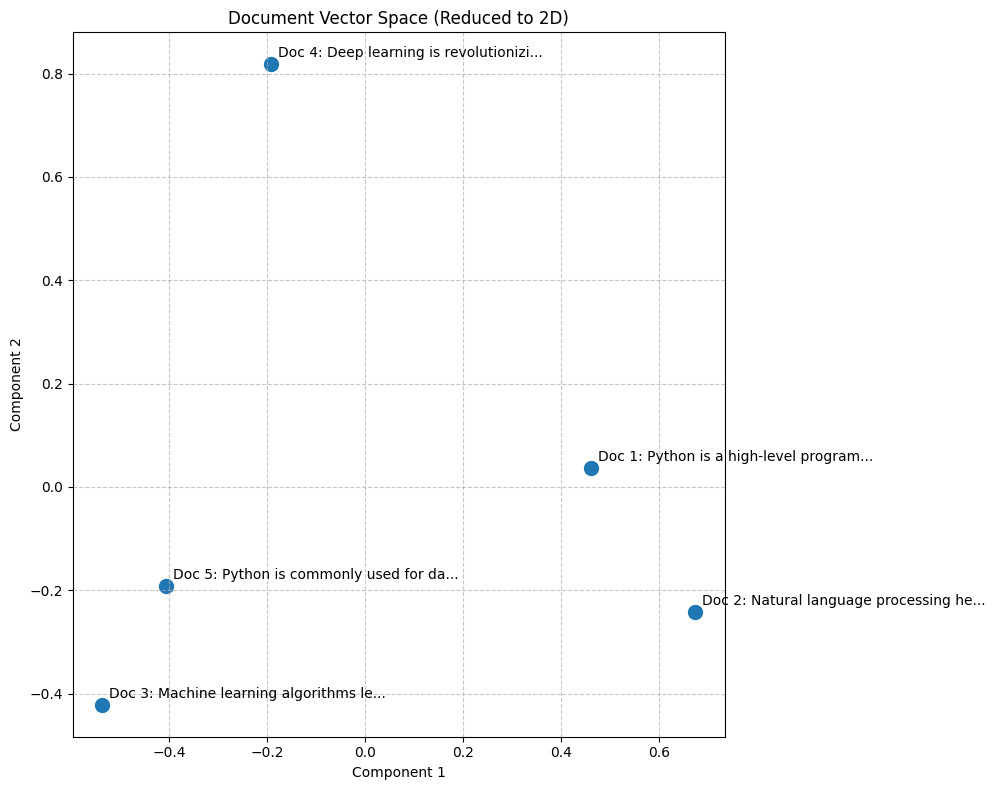

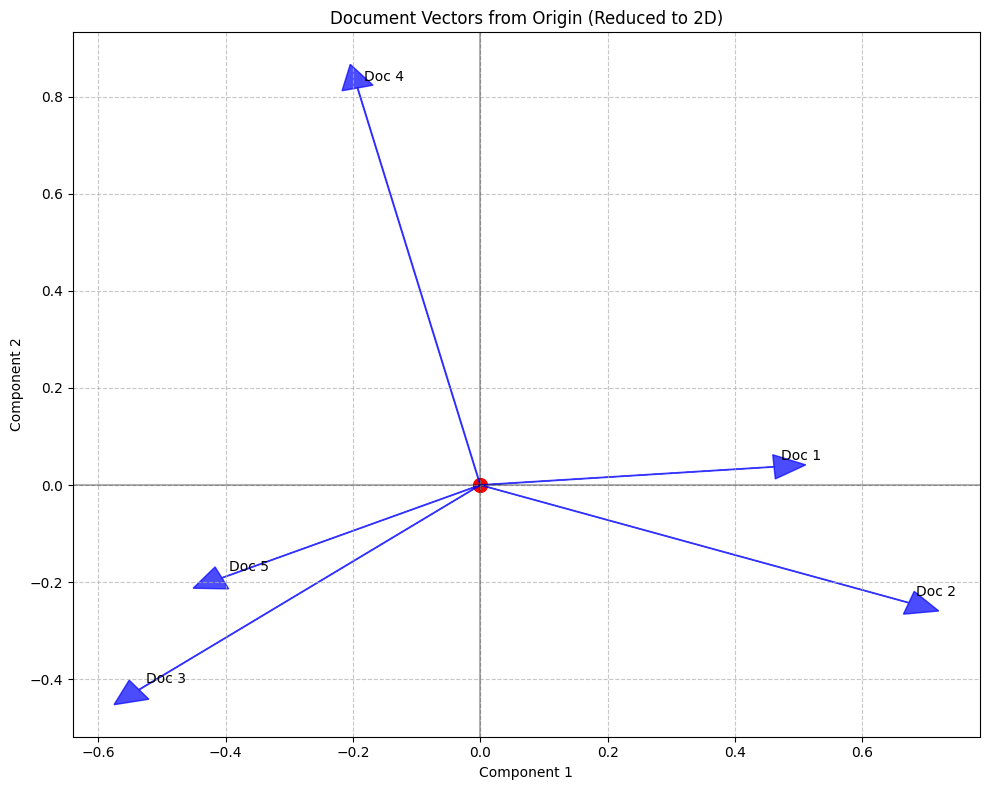

In [7]:
from sklearn.decomposition import PCA

# Reduce the document vectors to 2 dimensions for visualization
pca = PCA(n_components=2)
documents_2d = pca.fit_transform(document_vectors.toarray())

# Plot the documents
plt.figure(figsize=(10, 8))
plt.scatter(documents_2d[:, 0], documents_2d[:, 1], marker='o', s=100)

# Add labels for each document
for i, doc in enumerate(documents):
    short_doc = doc[:30] + "..." if len(doc) > 30 else doc
    plt.annotate(f"Doc {i+1}: {short_doc}", 
                 (documents_2d[i, 0], documents_2d[i, 1]),
                 xytext=(5, 5), textcoords='offset points')

plt.title('Document Vector Space (Reduced to 2D)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Add arrows from origin to represent document vectors
plt.figure(figsize=(10, 8))
plt.scatter(0, 0, marker='o', color='red', s=100)  # Origin

for i, (x, y) in enumerate(documents_2d):
    plt.arrow(0, 0, x, y, head_width=0.05, head_length=0.05, fc='blue', ec='blue', alpha=0.7)
    plt.annotate(f"Doc {i+1}", (x, y), xytext=(5, 5), textcoords='offset points')

plt.title('Document Vectors from Origin (Reduced to 2D)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()



In this visualization:
- Documents with similar content appear closer in the 2D space
- The angle between vectors from the origin represents their cosine similarity
- Smaller angles = higher cosine similarity

Remember that this is just a 2D approximation of the high-dimensional space where our document vectors actually reside!

## 7. Limitations of Cosine Similarity

While powerful, cosine similarity has some important limitations:

### 1. No Semantic Understanding

Cosine similarity treats words as independent dimensions and doesn't understand:
- Synonyms (e.g., "car" and "automobile" are treated as completely different)
- Word order (e.g., "dog bites man" and "man bites dog" would have identical vectors)
- Context (the same word can have different meanings in different contexts)

### 2. Fixed Vocabulary

Traditional vector models like bag-of-words and TF-IDF require building a vocabulary first:
- Out-of-vocabulary words in new documents are ignored
- The model cannot generalize to previously unseen words

### 3. Dense Vectors Only Mitigate These Issues

More modern approaches like word embeddings (Word2Vec, GloVe) and contextual embeddings (BERT, transformers) address some of these limitations, but cosine similarity itself remains a simple geometric measure.

## 8. Micro-Quiz: Test Your Understanding

Let's reinforce what we've learned with a quick quiz! Try to answer these questions before checking the solutions.

### Question 1
What happens to the cosine similarity between two documents if one document is duplicated (i.e., the same text is repeated twice)?
<details>
<summary>Click to see answer</summary>
The cosine similarity remains the same (1.0 if comparing the document with itself). This is because cosine similarity measures the angle between vectors, not their magnitude. Duplicating a document changes its length (magnitude) but not its direction in the vector space.
</details>

### Question 2
Document A contains ["apple", "orange", "banana"] and Document B contains ["apple", "grape", "kiwi"]. If we use simple word presence vectors (1 if the word is present, 0 if not), what is the cosine similarity between these documents?
<details>
<summary>Click to see answer</summary>
Using the vocabulary ["apple", "orange", "banana", "grape", "kiwi"]:
- Document A vector: [1, 1, 1, 0, 0]
- Document B vector: [1, 0, 0, 1, 1]

Cosine similarity = (1×1 + 1×0 + 1×0 + 0×1 + 0×1) / (√(1²+1²+1²+0²+0²) × √(1²+0²+0²+1²+1²))
= 1 / (√3 × √3) = 1/3 ≈ 0.333
</details>

### Question 3
Which of the following would likely have the highest cosine similarity if using TF-IDF vectors?
a) Two articles about different basketball teams
b) An article about basketball and an article about quantum physics
c) An article about basketball and a single tweet mentioning "I watched basketball yesterday"
<details>
<summary>Click to see answer</summary>
a) Two articles about different basketball teams would likely have the highest cosine similarity, as they would share many domain-specific terms with high TF-IDF weights.

Option b) would have very little vocabulary overlap.

Option c) might share the term "basketball," but the tweet is too short to establish much similarity, and the word's IDF would reduce its impact.
</details>

## 9. Practical Exercise: Building a Simple Document Similarity Tool

Let's put everything together and build a simple tool that finds the most similar documents in a corpus:

Found 1 similar document pairs (similarity >= 0.3):

Pair 1 (Similarity: 0.309):
Doc 2: Machine learning algorithms require large amounts of training data.
Doc 6: Data scientists use machine learning to extract insights from data.



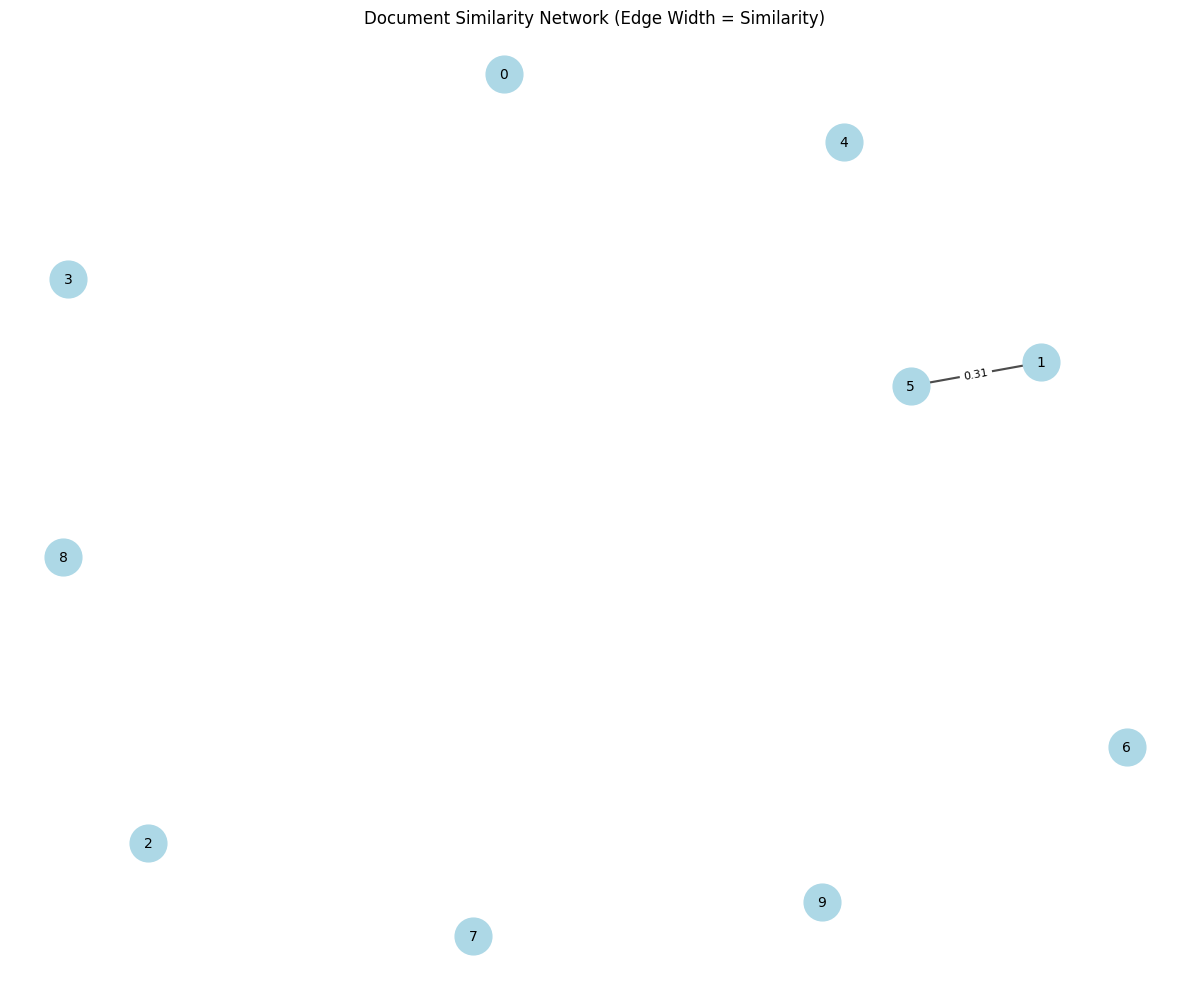

In [10]:
# Sample corpus of documents
corpus = [
    "Artificial intelligence is revolutionizing the technology industry.",
    "Machine learning algorithms require large amounts of training data.",
    "Natural language processing helps computers understand human language.",
    "Deep learning models have achieved remarkable results in computer vision.",
    "Technology companies are investing heavily in artificial intelligence research.",
    "Data scientists use machine learning to extract insights from data.",
    "Computer vision systems can recognize objects in images and videos.",
    "Neural networks are inspired by the structure of the human brain.",
    "Reinforcement learning enables agents to learn through interaction with an environment.",
    "Self-driving cars use artificial intelligence to navigate roads safely."
]

# Create a function to find similar documents
def find_similar_documents(corpus, threshold=0.3):
    """Find all pairs of documents with similarity above the threshold."""
    # Process and vectorize
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform(corpus)
    
    # Calculate similarity matrix
    similarity_matrix = cosine_similarity(vectors)
    
    # Find similar pairs
    similar_pairs = []
    for i in range(len(corpus)):
        for j in range(i+1, len(corpus)):  # Only check each pair once
            if similarity_matrix[i, j] >= threshold:
                similar_pairs.append({
                    'doc1_id': i,
                    'doc2_id': j,
                    'doc1_text': corpus[i],
                    'doc2_text': corpus[j],
                    'similarity': similarity_matrix[i, j]
                })
    
    # Sort by similarity (descending)
    similar_pairs.sort(key=lambda x: x['similarity'], reverse=True)
    return similar_pairs

# Find and display similar document pairs
similar_docs = find_similar_documents(corpus, threshold=0.3)

print(f"Found {len(similar_docs)} similar document pairs (similarity >= 0.3):\n")
for i, pair in enumerate(similar_docs, 1):
    print(f"Pair {i} (Similarity: {pair['similarity']:.3f}):")
    print(f"Doc {pair['doc1_id'] + 1}: {pair['doc1_text']}")
    print(f"Doc {pair['doc2_id'] + 1}: {pair['doc2_text']}")
    print()

# Visualize the document similarity network
import networkx as nx

# Create a graph
G = nx.Graph()

# Add nodes (documents)
for i, doc in enumerate(corpus):
    short_doc = doc[:30] + "..." if len(doc) > 30 else doc
    G.add_node(i, label=f"Doc {i+1}")

# Add edges (similarities above threshold)
for pair in similar_docs:
    G.add_edge(pair['doc1_id'], pair['doc2_id'], 
               weight=pair['similarity'], 
               label=f"{pair['similarity']:.2f}")

# Draw the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # Position nodes using force-directed layout

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')

# Draw edges with width proportional to similarity
edge_weights = [G[u][v]['weight'] * 5 for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=edge_weights, alpha=0.7)

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edge labels (similarities)
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Document Similarity Network (Edge Width = Similarity)")
plt.axis('off')
plt.tight_layout()
plt.show()

## 10. Looking Ahead: Beyond Cosine Similarity

Cosine similarity is just the beginning! Here's what we'll explore in future notebooks:

### Contextual Embeddings
Modern NLP models like BERT, GPT, and others create contextual embeddings where the same word has different vectors depending on its context.

### Semantic Similarity
Beyond lexical similarity, we can measure how semantically related texts are, even if they use different words.

### Pointwise Mutual Information (PMI)
Our next topic! PMI helps identify words that co-occur more frequently than expected by chance, revealing meaningful associations.

## 11. Summary

In this notebook, we've:

- Understood what cosine similarity is and why it's useful for text data
- Learned how to calculate it both manually and using libraries
- Explored its applications in search, recommendations, and clustering
- Visualized document relationships in vector space
- Built practical tools using cosine similarity
- Discussed its limitations and future directions

Remember that cosine similarity measures the angle between vectors, making it ideal for comparing text documents regardless of their length. By focusing on the proportion of terms rather than their absolute counts, it gives us a meaningful measure of how similar two texts are in their content.

## 12. Practice Exercises

To solidify your understanding, try these exercises on your own:

1. Implement a simple plagiarism detector using cosine similarity
2. Create a content-based recommendation system for your favorite articles
3. Investigate how preprocessing (stemming, lemmatization, removing stopwords) affects similarity scores
4. Compare cosine similarity with other similarity measures (Jaccard, Euclidean distance)
5. Experiment with word embeddings instead of TF-IDF for calculating document similarity

Good luck, and happy coding!